In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, fftfreq, fft2, ifft2


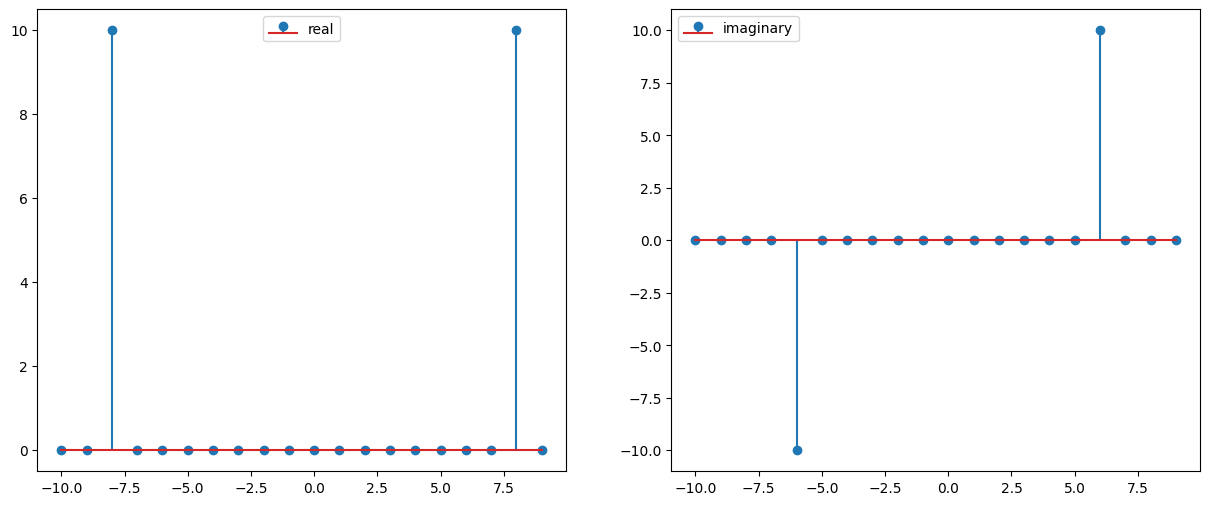

In [ ]:
def f(x):
    return np.cos(2*x) + np.sin(4*x)

L = 2*np.pi
N = 20

xcs = np.linspace(0, L, N, endpoint = False)
fcs = f(xcs)
fcsHat = fft(fcs)
fcsHatShift = fftshift(fcsHat)
freqs = fftfreq(N, d = L/N)*L       # Heltallsfrekvenser
freqsShift = fftshift(freqs)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
ax1.stem(freqs, fcsHatShift.real, label = "real")
ax2.stem(freqs, fcsHatShift.imag, label = "imaginary")
ax1.legend()
ax2.legend()
plt.show()


In [ ]:
def heatBackwarEuler(*, kappa,
                     U0, t0, T,
                     X, Y, Nt,
                     g = None):
    x, y = X[0,:], Y[:,0]
    dx, dy = x[1] - x[0], y[1] - y[0]
    Nx, Ny = len(x), len(y)

    kx, ky = fftfreq(Nx, d = dx)*2*np.pi, fftfreq(Ny, d = dy)*2*np.pi
    KX, KY = np.meshgrid(kx, ky, sparse = True)
    K2 = KX**2 + KY**2
    
    t = t0
    dt = (T - t0)/Nt
    UHat = fft2(U0)

    yield UHat, t

    while (t < T + dt/2):
        if g is not None:
            GHat = fft2(g(X, Y, t + dt))        # Neste G
        else:
            GHat = 0
        
        UHat = (UHat + GHat * dt) / (kappa * K2 * dt + 1)
        t = t + dt
        yield UHat, t


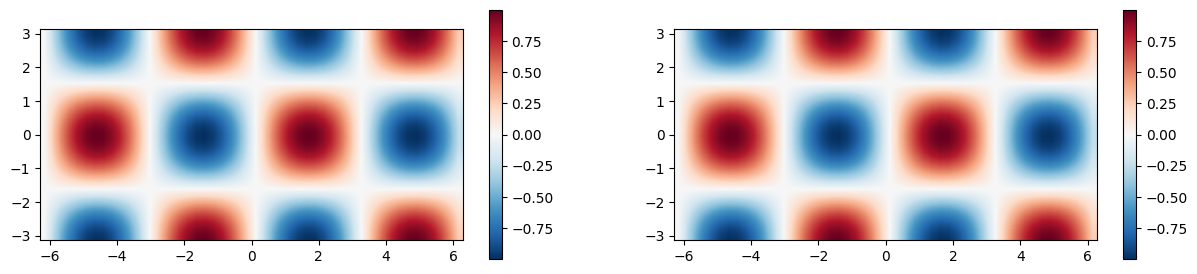

In [30]:
def uEx(x, y, t):
    return np.sin(x) * np.cos(y) * np.exp(-2 * kappa * t)

kappa = 1
Lx, Ly = 4*np.pi, 2*np.pi
Nx, Ny = 40, 20
t0, T = 0, 1
Nt = 10
x, y = np.linspace(-Lx/2, Lx/2, endpoint = False), np.linspace(-Ly/2, Ly/2, endpoint = False)
X, Y = np.meshgrid(x, y, sparse = True)
U0 = uEx(X, Y, t0)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
lol = ax1.imshow(uEx(X, Y, t0), cmap = "RdBu_r", interpolation = "bilinear", extent = [-Lx/2, Lx/2, -Ly/2, Ly/2])
plt.colorbar(lol, shrink = 0.54)

solver = heatBackwarEuler(kappa=kappa, U0=U0, t0=t0, T=T, X=X, Y=Y, Nt=Nt, g=None)

i = 0
for UHat, t in solver:
    while i < 1:
        U = ifft2(UHat).real
        lol = ax2.imshow(U, cmap = "RdBu_r", interpolation = "bilinear", extent = [-Lx/2, Lx/2, -Ly/2, Ly/2])
        i += 1

plt.colorbar(lol, shrink = 0.54)
plt.show()

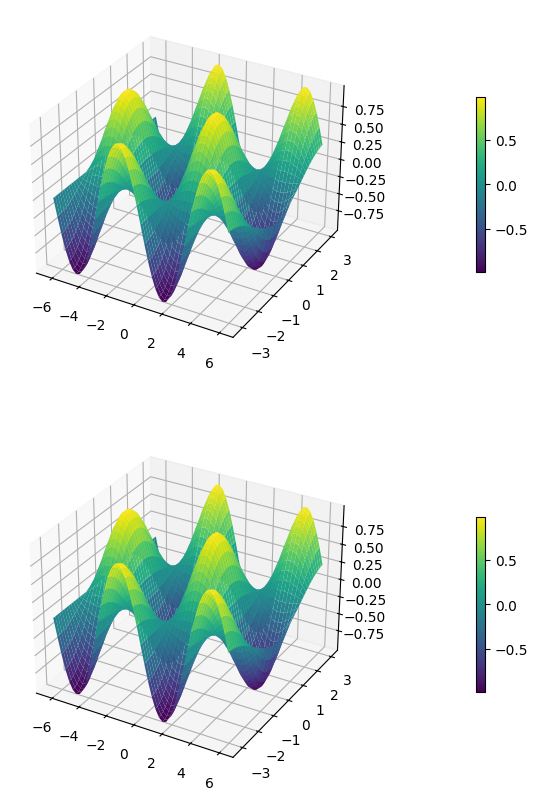

In [31]:
fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(211, projection = "3d")
ax2 = fig.add_subplot(212, projection = "3d")

surf1 = ax1.plot_surface(X, Y, uEx(X, Y, t0), cmap = "viridis")
plt.colorbar(surf1, shrink = 0.5, pad = 0.1)

solver = heatBackwarEuler(kappa=kappa, U0=U0, t0=t0, T=T, X=X, Y=Y, Nt=Nt, g=None)

i = 0
for UHat, t in solver:
    while i < 1:
        U = ifft2(UHat).real
        surf2 = ax2.plot_surface(X, Y, U, cmap = "viridis")
        plt.colorbar(surf2, shrink = 0.5, pad = 0.1)
        i += 1

plt.show()